In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Read the data:
URL = 'https://bit.ly/3NLoDzx'
df = pd.read_csv(URL, skiprows=[1])

# Remove leading whitespace from the column names:
df.columns = df.columns.str.strip()

# Drop unnecessary columns:
df = df.drop(df.columns[[4, 5]], axis=1)

# Group by monthly MINIMUM ice extent:
df = df.groupby(['Year', 'Month']).agg({'Extent': ['min']}).reset_index()

# Create a 'date' column from the 'Year' and 'Month' columns:
cols = ['Year', 'Month']
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), 
                            axis="columns")
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the DataFrame index:
df = df.set_index(df['date'])

# Drop unnecessary year, month, and date columns:
df = df.drop(df.columns[[0, 1, 3]], axis=1)

# Calculate the yearly moving average:
df['yearly_ma'] = df.Extent.rolling(12).mean()

# Check the results:
df.tail(10)

,Extent,yearly_ma
,min,
date,,
2021-09-01,4.757,9.559750
2021-10-01,5.395,9.636083
2021-11-01,8.648,9.749750
2021-12-01,11.287,9.826583
2022-01-01,13.302,9.875917
2022-02-01,14.365,9.889000
2022-03-01,14.360,9.894083
2022-04-01,13.555,9.902417


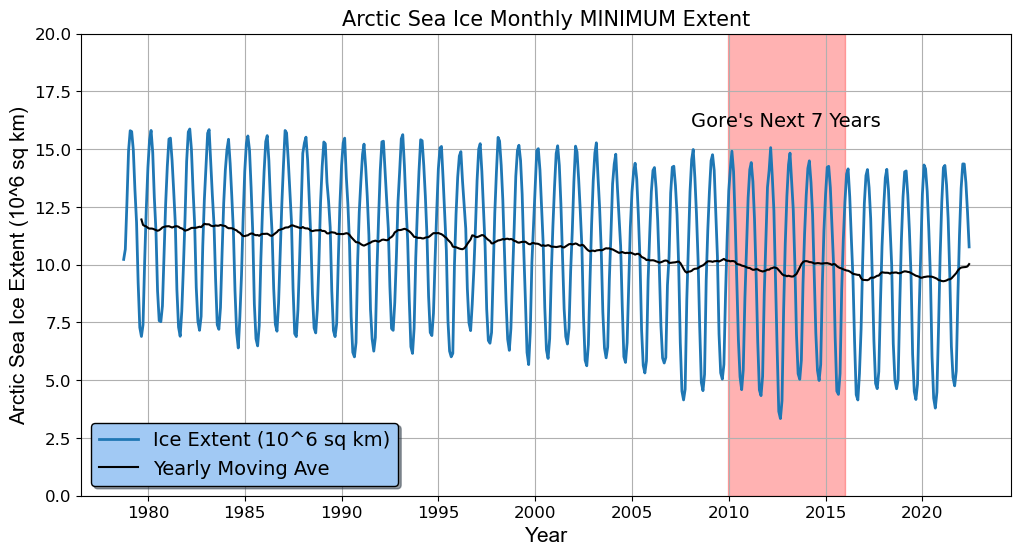

In [3]:
# Create the plot:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Arctic Sea Ice Monthly MINIMUM Extent', size=15)
ax.plot(df['Extent'], lw=2)
ax.plot(df['yearly_ma'], color='k')
ax.set_ylim([0, 20])
ax.tick_params(axis='both', 
               which='major', 
               labelsize=12)
ax.grid()

# Add a legend:
ax.legend(['Ice Extent (10^6 sq km)', 'Yearly Moving Ave'],
           frameon=True,
           loc=3,
           prop={'size': 14},
           facecolor='#a1c9f4',
           edgecolor='k',
           fancybox=True,
           shadow=True,
           framealpha=1)

# Add a shaded span for Gore's prediction:
ax.axvspan(*mdates.datestr2num(['2009-12-14', '2016-1-1']), 
           color='red', 
           alpha=0.3)

# Annotate the 7-year span referenced by Gore in 2009:
ax.text(0.655, 0.8, 
        "Gore's Next 7 Years", 
        transform=ax.transAxes, 
        fontsize=14)

# Set the x and y labels:
font1 = {'family': 'arial', 
         'color': 'black', 
         'size': 15}
ax.set_xlabel('Year', fontdict=font1)
ax.set_ylabel('Arctic Sea Ice Extent (10^6 sq km)', 
              fontdict=font1)

plt.show()